In [1]:
import numpy as np
import SimLight as sl
import SimLight.plottools as slpl

SimLight 0.0.2



In [2]:
wavelength = 0.633  # µm
size = 25.4  # mm
res = 200  # pixel number
f = 50  # mm
A = 1 / 100

In [3]:
F = sl.PlaneWave(wavelength, size, res)
x = np.linspace(-F.size / 2, F.size / 2, F.N)
X, Y = np.meshgrid(x, x)
R = np.sqrt(X**2 + Y**2)
F.complex_amp[R >= F.size/2] = 0

In [4]:
L = sl.Lens.new_lens(size, f)
Z = sl.zernike.ZernikeCofficients(15)
Z.cofficients[5] = 1 * A
Z.cofficients[7] = 0.2 * A
Z.cofficients[9] = 0.5 * A
Z.__dict__

{'_j': 15,
 '_input_cofficients': [],
 '_n': array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4]),
 '_m': array([ 0, -1,  1, -2,  0,  2, -3, -1,  1,  3, -4, -2,  0,  2,  4]),
 '_norm': array([0.        , 1.41421356, 1.41421356, 1.73205081, 1.73205081,
        1.73205081, 2.        , 2.        , 2.        , 2.        ,
        2.23606798, 2.23606798, 2.23606798, 2.23606798, 2.23606798]),
 '_cofficients': array([0.   , 0.   , 0.   , 0.   , 0.   , 0.01 , 0.   , 0.002, 0.   ,
        0.005, 0.   , 0.   , 0.   , 0.   , 0.   ])}

In [5]:
F, phi = sl.aberration(F, Z)
F.plot_wavefront(dimension=2, mask_r=1)
F = sl.near_field_propagation(F, L, f)

TypeError: cannot unpack non-iterable PlaneWave object

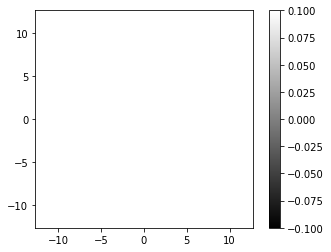

In [6]:
F.plot_intensity(dimension=2, norm_type=1)